<a href="https://colab.research.google.com/github/mkandaleft/COMP432-GroupM/blob/main/Comp432.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic includes.
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics
import torch
import torchvision
import random

# Do we need pandas, etc?

# Use the GPU if available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# Task specific includes.
import zipfile

# Download and unzip the first dataset.
!gdown 1ezX0lJaB8atZesMns4cGHR3pXkRTEKSt # Roxane: I put the dataset on my Drive for ease of downloading.

with zipfile.ZipFile("/content/Dataset1.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

data_path = "/content/Colorectal Cancer_"

Downloading...
From: https://drive.google.com/uc?id=1ezX0lJaB8atZesMns4cGHR3pXkRTEKSt
To: /content/Dataset1.zip
100% 814M/814M [00:07<00:00, 102MB/s]


In [ ]:
# Load the data to a torch tensor.

# Code partly provided by the outline for assignment 1.
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # Data normalization done here.
dataset = torchvision.datasets.ImageFolder(data_path, transforms) # Load the images and their labels into a tensor.

train_set, test_set = torch.utils.data.random_split(dataset, [0.7,0.3]) # Split the dataset into training and testing set.

batch_size = 100 # What batch size do we want?
train_loader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=batch_size)#, num_workers=2) # Create train loader. The multiple workers were being a fuck :/
test_loader = torch.utils.data.DataLoader(test_set, shuffle=True)#, num_workers=2) # Create test loader.

torch.Size([3, 224, 224]) 2


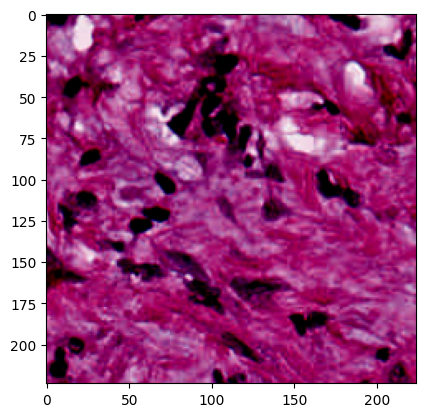

In [ ]:
# Look at a random sample from the normalized training set.
index = random.randint(0, len(train_set))
image, label = train_set[index]
plt.imshow(image.numpy().transpose(1, 2, 0))
print(image.shape, label)

# Instead, print the same image before and after loading in the dataset?

# Preprocess the data.
# Do we need to do data augmentation?

In [ ]:
## Declare the model
# https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html

resnet18 = torchvision.models.resnet18() # Do we need any special parameters?
resnet18 = resnet18.to(device)

In [ ]:
# Train the model with the dataset.

learning_rate = 0.001
num_epoch = 20

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(resnet18.parameters(), lr = learning_rate, momentum = 0.9, weight_decay = 0.001) # Customize other params?
#optimizer = torch.optim.Adam(resnet18.parameters(), lr = learning_rate) # Should we use adam instead of SGD? It didn't give good results when I tried.

next_epoch = 1
for epoch in range(next_epoch, next_epoch+num_epoch):
    resnet18.train()

    for i, batch in enumerate(train_loader, 0):
        X, y = batch

        X = X.to(device)
        y = y.to(device)

        y_pred = resnet18(X)
        loss = loss_function(y_pred, y)

        resnet18.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch %2d: loss on final training batch: %.4f" % (epoch, loss.item()))

next_epoch = epoch+1

Epoch  1: loss on final training batch: 0.7489
Epoch  2: loss on final training batch: 0.4243
Epoch  3: loss on final training batch: 0.4350
Epoch  4: loss on final training batch: 0.3005
Epoch  5: loss on final training batch: 0.2250
Epoch  6: loss on final training batch: 0.1320
Epoch  7: loss on final training batch: 0.1462
Epoch  8: loss on final training batch: 0.2235
Epoch  9: loss on final training batch: 0.0852
Epoch 10: loss on final training batch: 0.1064
Epoch 11: loss on final training batch: 0.0659
Epoch 12: loss on final training batch: 0.1003
Epoch 13: loss on final training batch: 0.0473
Epoch 14: loss on final training batch: 0.0500
Epoch 15: loss on final training batch: 0.0704
Epoch 16: loss on final training batch: 0.0349
Epoch 17: loss on final training batch: 0.0310
Epoch 18: loss on final training batch: 0.0346
Epoch 19: loss on final training batch: 0.0172
Epoch 20: loss on final training batch: 0.0238


In [ ]:
# Testing time!

# Roxane: I mostly copied the work I'd done for my assignment 1, so we'll likely need to modify this, have it print more info, etc.

resnet18.eval()

# Test and report on the training data.
y_train_true = []
y_train_pred = []

for data in train_loader:
  train_inputs, train_labels = data
  train_inputs, train_labels = train_inputs.to(device), train_labels.to(device)
  y_train_true.extend(train_labels.tolist())

  output = torch.softmax(resnet18(train_inputs), dim=1)
  y_train_pred.extend(output.argmax(dim=1).cpu().numpy().tolist())

class_report_train = sklearn.metrics.classification_report(y_train_true, y_train_pred)
print("Classification report for the training set:")
print(class_report_train)
print("\nConfusion matrix for the training set:")
print(sklearn.metrics.confusion_matrix(y_train_true, y_train_pred))


# Test and report on the testing data.
y_test_true = []
y_test_pred = []

for data in test_loader:
  test_inputs, test_labels = data
  test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
  y_test_true.extend(test_labels.tolist())

  output = torch.softmax(resnet18(test_inputs), dim=1)
  y_test_pred.extend(output.argmax(dim=1).cpu().numpy().tolist())

class_report_test = sklearn.metrics.classification_report(y_test_true, y_test_pred)
print("\nClassification report for the testing set:")
print(class_report_test)
print("\nConfusion matrix for the testing set:")
print(sklearn.metrics.confusion_matrix(y_test_true, y_test_pred))

Classification report for the training set:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1394
           1       0.98      1.00      0.99      1406
           2       0.97      1.00      0.98      1400

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200


Confusion matrix for the training set:
[[1323   23   48]
 [   0 1406    0]
 [   1    4 1395]]

Classification report for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       606
           1       0.98      1.00      0.99       594
           2       0.93      0.99      0.96       600

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800


Confusion matrix for the testing set:
[[557   8  41]
 

In [ ]:
# Save / Export the model and its weights.

torch.save(resnet18, "resnet18_model.pth")
torch.save(resnet18.state_dict(), "resnet18_weights.pth")

In [ ]:
example_index = 0  # Change this index to visualize different images in your dataset.
example_image, example_label = dataset[example_index]

# Revert the normalization to properly display the image.
mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]
unnormalize = torchvision.transforms.Normalize((-1 * m / s for m, s in zip(mean, std)), (1.0 / s for s in std))
unnormalized_img = unnormalize(example_image)

# Convert from Tensor to NumPy for visualization.
img_np = example_image.permute(1, 2, 0).numpy()
unnormalized_np = unnormalized_img.permute(1, 2, 0).numpy()

# Plot both normalized and unnormalized images.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_np)
axes[0].set_title('Original Image (Normalized)')
axes[0].axis('off')

axes[1].imshow(unnormalized_np)
axes[1].set_title('Unnormalized Image')
axes[1].axis('off')

plt.show()

TypeError: ignored

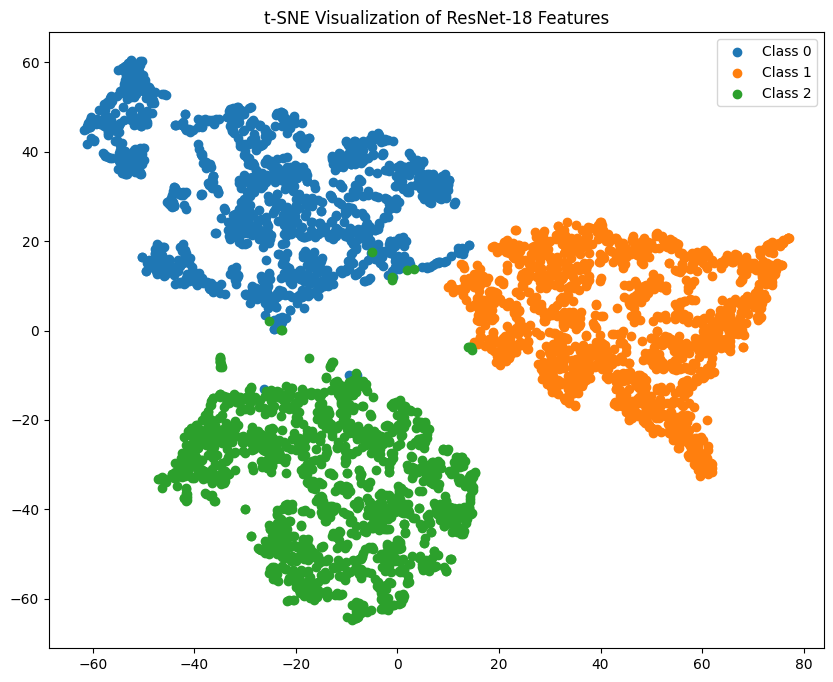

In [ ]:
from sklearn.manifold import TSNE

resnet18.eval()

# Store features and labels
features_list = []
labels_list = []

# Get the features and labels
for data in train_loader:
    train_inputs, train_labels = data
    train_inputs, train_labels = train_inputs.to(device), train_labels.to(device)
    features = resnet18(train_inputs).detach().cpu().numpy()
    features_list.append(features)
    labels_list.append(train_labels.cpu().numpy())

# Concatenate features and labels
features = torch.from_numpy(np.concatenate(features_list))
labels = torch.from_numpy(np.concatenate(labels_list))

# Reshape the features tensor if needed
features = features.view(features.size(0), -1)  # Reshape if necessary for t-SNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
embedded_features = tsne.fit_transform(features)

# Plot the t-SNE embedded features with class labels
plt.figure(figsize=(10, 8))
for class_idx in range(3):
    plt.scatter(
        embedded_features[labels == class_idx, 0],
        embedded_features[labels == class_idx, 1],
        label=f"Class {class_idx}",
    )
plt.title('t-SNE Visualization of ResNet-18 Features')
plt.legend()
plt.show()